# 03.2 Backpropagation Network for hand-written recognition
#### 賴昱瑋 YU-WEI LAI, 2020
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
DRtraining = pd.read_excel(r'03.2_DRtraining.xlsx', 'training')
DRtraining = DRtraining.iloc[:, 1:]
DRtraining.head()

,Pixel001,Pixel002,Pixel003,Pixel004,Pixel005,Pixel006,Pixel007,Pixel008,Pixel009,Pixel010,Pixel011,Pixel012,Pixel013,Pixel014,Pixel015,Pixel016,Pixel017,Pixel018,Pixel019,Pixel020,Pixel021,Pixel022,Pixel023,Pixel024,Pixel025,Pixel026,Pixel027,Pixel028,Pixel029,Pixel030,Pixel031,Pixel032,Pixel033,Pixel034,Pixel035,Pixel036,Pixel037,Pixel038,Pixel039,Pixel040,...,Pixel227,Pixel228,Pixel229,Pixel230,Pixel231,Pixel232,Pixel233,Pixel234,Pixel235,Pixel236,Pixel237,Pixel238,Pixel239,Pixel240,Pixel241,Pixel242,Pixel243,Pixel244,Pixel245,Pixel246,Pixel247,Pixel248,Pixel249,Pixel250,Pixel251,Pixel252,Pixel253,Pixel254,Pixel255,Pixel256,Target0,Target1,Target2,Target3,Target4,Target5,Target6,Target7,Target8,Target9
0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,...,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [3]:
DRpredict0 = pd.read_excel(r'03.2_DRpredict.xlsx', 'Predict')
DRpredict = DRpredict0.iloc[:, 1:]
DRpredict.head()

,Pixel001,Pixel002,Pixel003,Pixel004,Pixel005,Pixel006,Pixel007,Pixel008,Pixel009,Pixel010,Pixel011,Pixel012,Pixel013,Pixel014,Pixel015,Pixel016,Pixel017,Pixel018,Pixel019,Pixel020,Pixel021,Pixel022,Pixel023,Pixel024,Pixel025,Pixel026,Pixel027,Pixel028,Pixel029,Pixel030,Pixel031,Pixel032,Pixel033,Pixel034,Pixel035,Pixel036,Pixel037,Pixel038,Pixel039,Pixel040,...,Pixel227,Pixel228,Pixel229,Pixel230,Pixel231,Pixel232,Pixel233,Pixel234,Pixel235,Pixel236,Pixel237,Pixel238,Pixel239,Pixel240,Pixel241,Pixel242,Pixel243,Pixel244,Pixel245,Pixel246,Pixel247,Pixel248,Pixel249,Pixel250,Pixel251,Pixel252,Pixel253,Pixel254,Pixel255,Pixel256,Target0,Target1,Target2,Target3,Target4,Target5,Target6,Target7,Target8,Target9
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Seperate the training dataset

In [4]:
DRtraining_x = DRtraining.iloc[:, 0:256]
DRtraining_y = DRtraining.iloc[:, 256:]
DRpredict_x = DRpredict.iloc[:, 0:256]
DRpredict_y = DRpredict.iloc[:, 256:]

In [5]:
# Seperate the dataset into a training set and a testing set
from sklearn.model_selection import train_test_split
DRtraining_x_train, DRtraining_x_test, DRtraining_y_train, DRtraining_y_test = train_test_split(DRtraining_x, DRtraining_y, test_size = 0.2) # Total 0.2 as testing
DRtraining_x_train, DRtraining_x_validation, DRtraining_y_train, DRtraining_y_validation = train_test_split(DRtraining_x_train, DRtraining_y_train, test_size = 0.125) # Total 0.1 as validation

DRtraining_y_train = np.array(DRtraining_y_train, dtype=int)
DRtraining_y_validation = np.array(DRtraining_y_validation, dtype=int)
DRtraining_y_test = np.array(DRtraining_y_test, dtype=int)

In [6]:
# Y as vector to label
DRtraining_y_train_label = [np.where(r == 1)[0][0] for r in DRtraining_y_train]

---
## Buildup a BPN Model
##### Reference:
- Oreilly: Hands on Machine Learning with Scikit-Learn, Keras, and Tensorflow

In [7]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = [256]),
  keras.layers.Dense(200, activation = 'relu'), # hid: relu
  keras.layers.Dense(100, activation = 'relu'), # hid: relu
  keras.layers.Dense(50, activation = 'relu'), # hid: relu
  keras.layers.Dense(10, activation = 'softmax') # Use softmax as activation
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               51400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 77,060
Trainable params: 77,060
Non-trainable params: 0
_________________________________________________________________


In [8]:
'''
weights1, biases1 = model.layers[1].get_weights() # hid 1
weights2, biases2 = model.layers[2].get_weights() # hid 2
weights3, biases3 = model.layers[3].get_weights() # hid 3
print(weights1, biases1)
print(weights2, biases2)
print(weights3, biases3)
'''

'\nweights1, biases1 = model.layers[1].get_weights() # hid 1\nweights2, biases2 = model.layers[2].get_weights() # hid 2\nweights3, biases3 = model.layers[3].get_weights() # hid 3\nprint(weights1, biases1)\nprint(weights2, biases2)\nprint(weights3, biases3)\n'

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(DRtraining_x_train, DRtraining_y_train, epochs = 50, validation_data = (DRtraining_x_validation, DRtraining_y_validation))

Epoch 1/50
35/35 [==============================] - 0s 9ms/step - loss: 2.2826 - accuracy: 0.1739 - val_loss: 2.2265 - val_accuracy: 0.2405
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 2.1645 - accuracy: 0.2871 - val_loss: 2.1216 - val_accuracy: 0.3418
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0398 - accuracy: 0.4040 - val_loss: 1.9880 - val_accuracy: 0.3987
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 1.8785 - accuracy: 0.4900 - val_loss: 1.8167 - val_accuracy: 0.4937
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 1.6817 - accuracy: 0.5752 - val_loss: 1.6246 - val_accuracy: 0.5886
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 1.4689 - accuracy: 0.6721 - val_loss: 1.4257 - val_accuracy: 0.6519
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 1.2576 - accuracy: 0.7437 - val_loss: 1.2333 - val_accuracy: 0.7215
Epoch 8/50
35/35 [==

In [10]:
model.evaluate(DRtraining_x_test, DRtraining_y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.9114


[0.261888325214386, 0.9113923907279968]

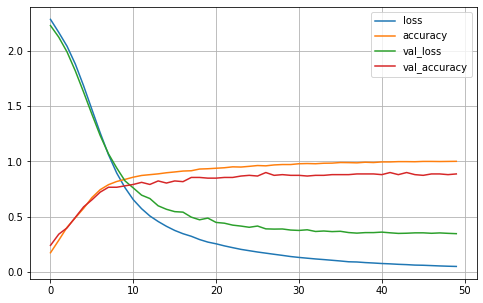

In [11]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.show()

### Try different model setting

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               51400     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 77,060
Trainable params: 77,060
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
35/35 [==============================] - 0s 7ms/step - loss: 2.4149 - accuracy: 0.1005 - val_loss: 2

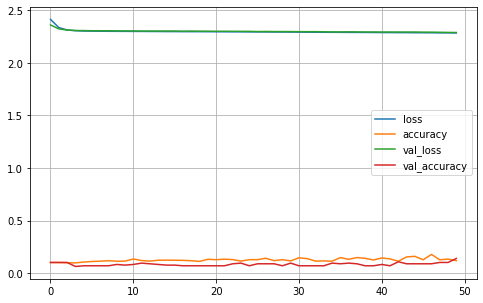

In [12]:
model1 = keras.models.Sequential([
  keras.layers.Flatten(input_shape = [256]),
  keras.layers.Dense(200, activation = 'sigmoid'), # hid sigmoid
  keras.layers.Dense(100, activation = 'sigmoid'), # hid sigmoid
  keras.layers.Dense(50, activation = 'sigmoid'), # hid sigmoid
  keras.layers.Dense(10, activation = 'softmax') # Use softmax as activation
])

print(model1.summary())

model1.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model1.fit(DRtraining_x_train, DRtraining_y_train, epochs = 50, validation_data = (DRtraining_x_validation, DRtraining_y_validation))

print(model1.evaluate(DRtraining_x_test, DRtraining_y_test))

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
35/35 [==============================] - 0s 8ms/step - loss: 2.2505 - accuracy: 0.1649 - val_loss: 2.1093 - val_accuracy: 0.2342
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.9680 - accuracy: 0.3315 - val_loss: 1.8854 - val_accuracy: 0.3924
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 1.7425 - accuracy: 0.47

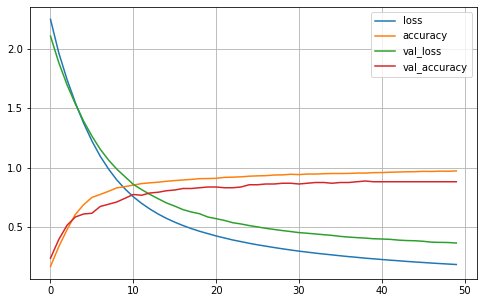

In [13]:
model2 = keras.models.Sequential([
  keras.layers.Flatten(input_shape = [256]),
  keras.layers.Dense(100, activation = 'relu'), # hid relu
  keras.layers.Dense(10, activation = 'softmax') # Use softmax as activation
])

print(model2.summary())

model2.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model2.fit(DRtraining_x_train, DRtraining_y_train, epochs = 50, validation_data = (DRtraining_x_validation, DRtraining_y_validation))

print(model2.evaluate(DRtraining_x_test, DRtraining_y_test))

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.show()

---
## Make predict for the prediction set

In [14]:
y_proba = model.predict(DRpredict_x)
y_proba

array([[3.00444356e-07, 5.76524856e-03, 4.81988650e-07, 3.17233827e-07,
        9.93537009e-01, 9.27148812e-06, 5.70198405e-04, 1.09669731e-04,
        6.91549394e-06, 5.26701172e-07],
       [9.99815643e-01, 1.51941341e-11, 1.35609907e-05, 1.76179338e-08,
        3.75641775e-08, 1.63068922e-04, 6.04203478e-06, 2.29850317e-09,
        1.01866522e-06, 7.44130830e-07],
       [1.90400715e-05, 4.01940497e-07, 1.23285736e-06, 3.52012321e-05,
        6.85063810e-07, 9.94571507e-01, 5.95718757e-06, 7.03624528e-06,
        8.98454800e-06, 5.35001280e-03],
       [7.83340394e-01, 2.40112104e-06, 3.18917483e-02, 2.48293974e-04,
        1.20166084e-03, 4.71301749e-02, 1.34683803e-01, 1.91511310e-04,
        1.21632149e-03, 9.37948716e-05],
       [1.23220107e-05, 5.76927596e-06, 1.76967238e-04, 3.18907597e-03,
        7.01381282e-07, 9.95172203e-01, 4.41631710e-04, 8.56298811e-07,
        4.52992448e-04, 5.47405216e-04],
       [8.18790019e-01, 1.55431408e-07, 1.14644445e-05, 3.11311532e-09,
   

In [15]:
y_label = np.argmax(model.predict(DRpredict_x), axis=-1)
y_result = pd.DataFrame({'No.': [k for k in range(1579, 1594)], 'Prediction': y_label.tolist()})
y_result

,No.,Prediction
0,1579,4
1,1580,0
2,1581,5
3,1582,0
4,1583,5
5,1584,0
6,1585,5
7,1586,0
8,1587,2
9,1588,5
